Round two
- Make a graph with obvious communities 
- (cliques only connected to each other by one edge)
- run the graph through Louvain and see if it decides properly

In [1]:
# setup imports and what not

%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from community.community_louvain import best_partition as louvain

import warnings
warnings.filterwarnings('ignore')

In [2]:
NUM_OF_COMMS = 4
COMM_SIZE = 10  # we'll go with 10 nodes per community

G = nx.Graph()  # make the graph object

# Make two communities and connect them by one edge
for c in range(NUM_OF_COMMS):
    for i in range(0 + c*COMM_SIZE, COMM_SIZE*(c+1), 1):
        for j in range(c*COMM_SIZE, i, 1):
            G.add_edge(i,j)
for i in range(NUM_OF_COMMS):
    for j in range(i):
        G.add_edge(i*COMM_SIZE,j*COMM_SIZE)

Is our graph right?\
\
Number of edges in a clique is
$$\binom{n}{2}=\frac{n!}{2!\times(n-2)!}=\frac{1}{2}n(n-1)$$

We've got four cliques and an edge connecting them all to each other.

In [3]:
n = 10
print(((1/2) * n * (n - 1) * 4) + (1/2) * 4 * (4 - 1))
print(len(list(G.edges)))

186.0
186


Looks good. And for visual intution:

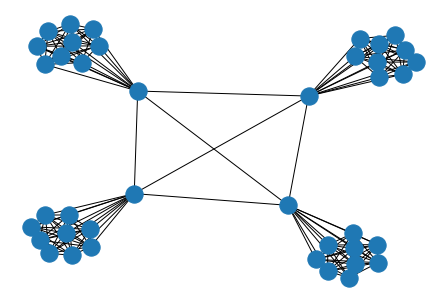

In [4]:
nx.draw(G)

Delicious. Let's run it through Louvain:

In [5]:
P = louvain(G)
print(P)

{1: 0, 0: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 11: 1, 10: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 21: 2, 20: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 31: 3, 30: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3}


Community map looks right.

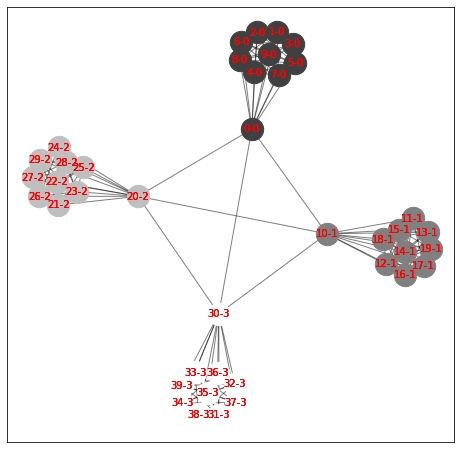

In [6]:
#create the labels and attach the partition number to it
labels=dict([(n, str(n) + '-' + str(P[n])) for n in G.nodes()])
plt.rcParams['figure.figsize'] = [8, 8]  # set the figure size
size = float(len(set(P.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(P.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in P.keys()
                                if P[nodes] == com]
    
    nx.draw_networkx_nodes(G, pos,
                           list_nodes,
                           node_color = str(count / size),
                           node_size = 500)
    nx.draw_networkx_labels(G, pos,
                            labels=labels,
                            font_color='red',
                            font_size=10)
                          
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()